In [19]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.integrate import solve_ivp

In [20]:
global mu10,mu20,mu1,mu2,gamma,D,eta,kappa,epis

In [21]:
def TwoSpecies(t,y):
    s1=y[0]
    s2=y[1]
    p1=y[2]
    p2=y[3]
    lambda11=mu1/mu10-1
    lambda21=epis*lambda11
    lambda22=mu2/mu20-1
    lambda12=epis*lambda22

    dydt=[mu1/s1*(s1+lambda12*p1)*s1*(1-s1-gamma*s2)-D*s1,
        mu2/s2*(s2+lambda21*p2)*s2*(1-gamma*s1-s2)-D*s2,
        mu1*(1+lambda12)*p1*(1-s1-gamma*s2)+eta*(s2+p1)*(s1-p1)-kappa*p1-D*p1,
        mu2*(1+lambda21)*p2*(1-gamma*s1-s2)+eta*(s1+p2)*(s2-p2)-kappa*p2-D*p2]
    return dydt


In [22]:
mu10=0.5
mu20=0.5
episs=[-0.2,-0.5,-0.8,-1]
gamma=0.99
kappa=0.005
D=0.2
initial=[0.5,0.5,0,0]
timespan=np.arange(0,200.1,0.1)

num=2000
mu1s=np.random.rand(num)
mu2s=np.random.rand(num)
etas=np.arange(0,0.6,0.1)
S1=np.zeros((len(episs),len(etas),num))
S2=np.zeros((len(episs),len(etas),num))

0
1
2
3


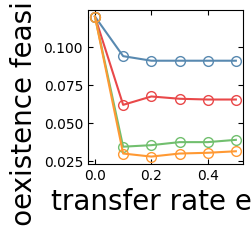

In [23]:
for i in range(len(episs)):
    print(i)
    epis=episs[i]
    for j in range(len(etas)):
        eta=etas[j]
        for k in range(num):
            mu1=mu1s[k]
            mu2=mu2s[k]
            sol=solve_ivp(TwoSpecies,[0,max(timespan)],initial,method='RK45',t_eval=timespan)
            y=np.transpose(sol.y)
            S1[i,j,k]=y[-1,0]
            S2[i,j,k]=y[-1,1]

thresh=0.01
prob=np.zeros((len(episs),len(etas)))
for i in range(len(episs)):
    for j in range(len(etas)):
        pin=0
        for k in range(num):
            if min(S1[i,j,k],S2[i,j,k])>thresh:
                pin=pin+1
        prob[i,j]=pin/num

plt.figure(figsize=(2,2))
for i in range(len(episs)):
    if i==0:
        plt.plot(etas,prob[i,:],'o-',markersize=7,fillstyle='none',color=(0.3467,0.5360,0.6907))
    if i==1:
        plt.plot(etas,prob[i,:],'o-',markersize=7,fillstyle='none',color=(0.9153,0.2816,0.2878))
    if i==2:
        plt.plot(etas,prob[i,:],'o-',markersize=7,fillstyle='none',color=(0.4416,0.7490,0.4322))
    if i==3:
        plt.plot(etas,prob[i,:],'o-',markersize=7,fillstyle='none',color=(1.0000,0.5984,0.2000))
plt.xlabel('transfer rate eta',fontsize=20)
plt.ylabel('coexistence feasibility',fontsize=20)
plt.tick_params(direction='in',top='true',right='true')
plt.savefig('Epsistasis_sign_2.pdf')
plt.show()

In [24]:
import pandas as pd
df=pd.DataFrame(prob)
df.to_csv("SourceData2.csv")